Develop a convolutional neural network (CNN) model to classify 
handwritten digits using the MNIST dataset. The goal is to train a model that 
accurately identifies digits (0-9) from images. 
Tools: None
 Procedure:
 1. Prepare the Data
 2. Define the Model
 3. Train the Model
 4. Evaluate the model
 5. Make predictions

Test Accuracy: 0.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


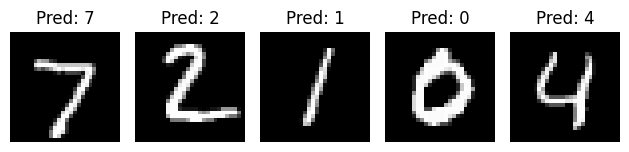

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# 1. Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[..., None] / 255.0
x_test = x_test[..., None] / 255.0

# 2. Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# 3. Compile and train
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, verbose=0)

# 4. Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.2f}")

# 5. Predict and display first 5 test images
predictions = model.predict(x_test[:5])
predicted_labels = tf.argmax(predictions, axis=1)

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i].numpy()}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8282 - loss: 0.5726 - val_accuracy: 0.9768 - val_loss: 0.0764
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9792 - loss: 0.0669 - val_accuracy: 0.9838 - val_loss: 0.0574
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9863 - loss: 0.0444 - val_accuracy: 0.9869 - val_loss: 0.0472
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9906 - loss: 0.0318 - val_accuracy: 0.9862 - val_loss: 0.0434
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9929 - loss: 0.0229 - val_accuracy: 0.9893 - val_loss: 0.0376
Test Accuracy: 0.9898
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


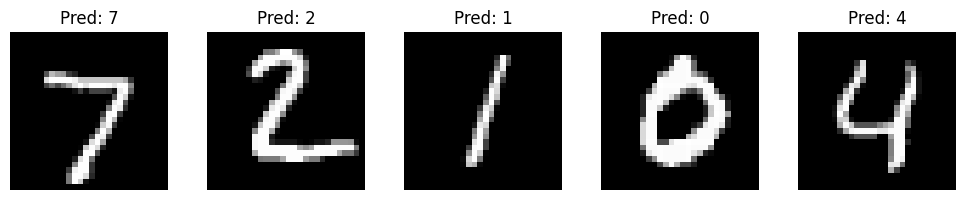

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# 1. Load and preprocess data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train[..., np.newaxis]/255.0, X_test[..., np.newaxis]/255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# 2. Build CNN model
model = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 3. Train model
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2)

# 4. Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# 5. Predict and visualize
sample_images = X_test[:5]
predictions = np.argmax(model.predict(sample_images), axis=1)

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(sample_images[i].squeeze(), cmap='gray')
    plt.title(f"Pred: {predictions[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()